## Groupby
dataframe을 key값에 따라 나눈 뒤 각각에 특정한 함수를 적용한 뒤 다시 합치고 싶을때 사용합니다.

groupby는 Split-Apply-Combine 단계를 거칩니다.

- **Split**: Key값에 따라 나눈 뒤
- **Apply**: 함수를 적용
- **Combine**: 다시 합치기

### 형식  df.groupy('열이름'),함수()
> 함수 : sum(), count(),min(),max(),mean(),meadian()


SQL의 **GROUP BY**와 유사합니다.
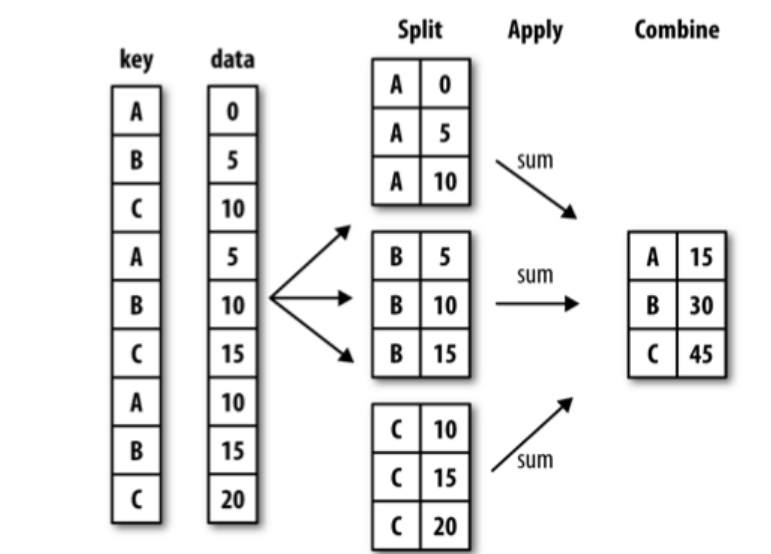

In [2]:
import pandas as pd

In [34]:
# df1변수에 './data/cctv_in_seoul.csv' 읽고 행,열 수와 head()확인
df1=pd.read_csv('./data/cctv_in_seoul.csv')
print(df1.shape)
df1.head()

(25, 6)


,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [35]:
# '2016년증감' 열 추가: 2016년-2015년
df1['2016증감']=df1['2015년']-df1['2016년']
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감
0,강남구,3238,1292,430,584,932,-348
1,강동구,1010,379,99,155,377,-222
2,강북구,831,369,120,138,204,-66
3,강서구,911,388,258,184,81,103
4,관악구,2109,846,260,390,613,-223


In [36]:
# '중감'열 추가 : '2016년 증감'이 0보다 크면 '증가' 그렇치 않으면 '감소'
df1['증감']=['증가'if i >0 else '감소' for i in df1['2016증감']]
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감
0,강남구,3238,1292,430,584,932,-348,감소
1,강동구,1010,379,99,155,377,-222,감소
2,강북구,831,369,120,138,204,-66,감소
3,강서구,911,388,258,184,81,103,증가
4,관악구,2109,846,260,390,613,-223,감소


In [37]:
#'구간'열 추가: 상: 소계>=2000, 중: 소계>=1500 하: 1500미만
df1['구간']=['상' if i >=2000 else '중' if i >=1500 else '하' for i in df1['소계']]
df1.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
0,강남구,3238,1292,430,584,932,-348,감소,상
1,강동구,1010,379,99,155,377,-222,감소,하
2,강북구,831,369,120,138,204,-66,감소,하
3,강서구,911,388,258,184,81,103,증가,하
4,관악구,2109,846,260,390,613,-223,감소,상


In [38]:
#각 구간별 최대값
df1.groupby('구간').max()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감
구간,,,,,,,,
상,은평구,3238,1843,430,584,932,-62,감소
중,종로구,1884,1142,314,451,630,156,증가
하,중랑구,1348,844,341,269,463,103,증가


In [39]:
#구간, 증감별 평균
df1.groupby(['구간','증감']).mean()

소계  2013년도 이전       2014년       2015년       2016년      2016증감
구간 증감                                                                        
상  감소  2388.333333     1315.5  238.500000  288.333333  546.000000 -257.666667
중  감소  1734.750000      804.5  141.750000  276.500000  512.000000 -235.500000
   증가  1651.000000     1009.0   78.000000  360.000000  204.000000  156.000000
하  감소  1094.666667      508.5  127.666667  131.083333  327.416667 -196.333333
   증가   913.500000      448.5  189.500000  180.500000   95.000000   85.500000

## matplotlib 시각화

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'#한글 깨짐 해결
plt.rcParams['axes.unicode_minus'] = False  #- 깨짐 해결

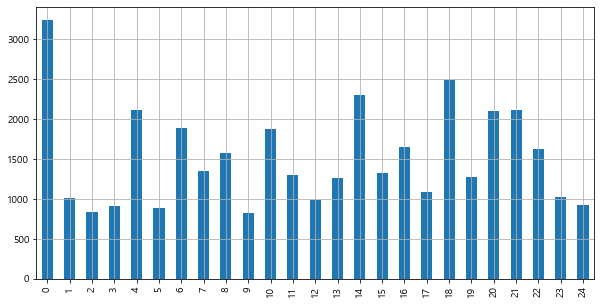

In [41]:
df1['소계'].plot(kind='bar', grid=True, figsize=(10, 5))

plt.show()

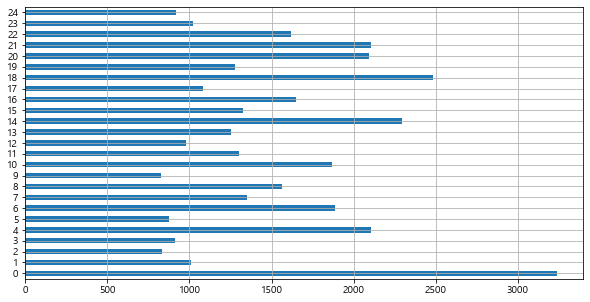

In [42]:
df1['소계'].plot(kind='barh', grid=True, figsize=(10, 5))
plt.show()

In [43]:
df2=df1.set_index('기관명')
df2.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,-348,감소,상
강동구,1010,379,99,155,377,-222,감소,하
강북구,831,369,120,138,204,-66,감소,하
강서구,911,388,258,184,81,103,증가,하
관악구,2109,846,260,390,613,-223,감소,상


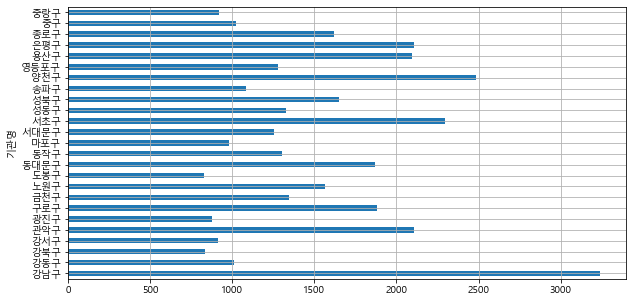

In [44]:
df2['소계'].plot(kind='barh', grid=True, figsize=(10, 5))
plt.show()

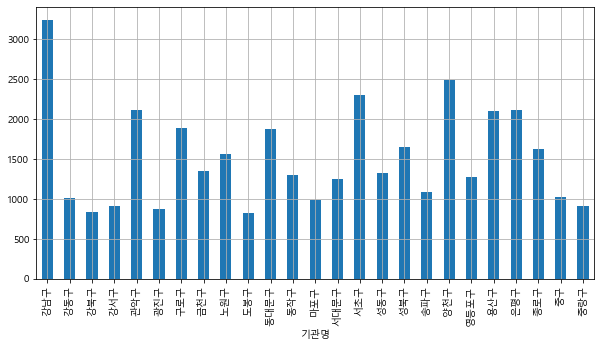

In [45]:
df2['소계'].plot(kind='bar', grid=True, figsize=(10, 5))
plt.show()

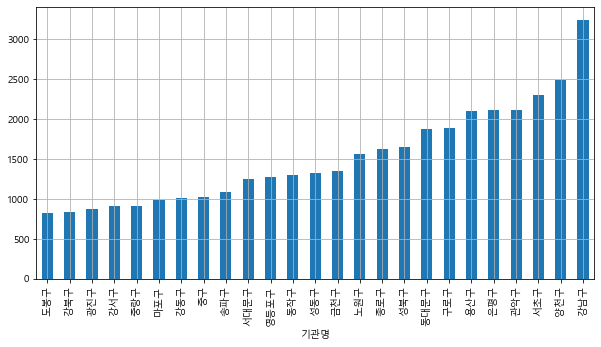

In [46]:
df2['소계'].sort_values().plot(kind='bar', grid=True, figsize=(10, 5))
plt.show()

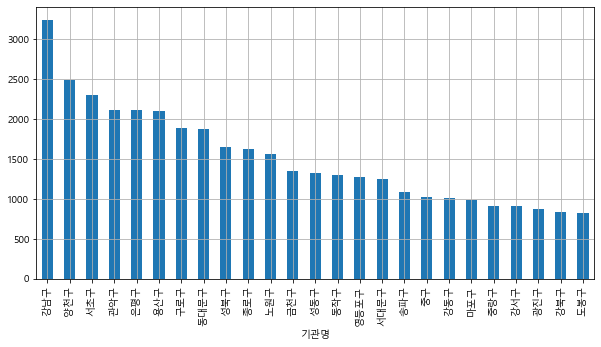

In [47]:
df2['소계'].sort_values(ascending=False).plot(kind='bar', grid=True, 
                                               figsize=(10, 5))
plt.show()

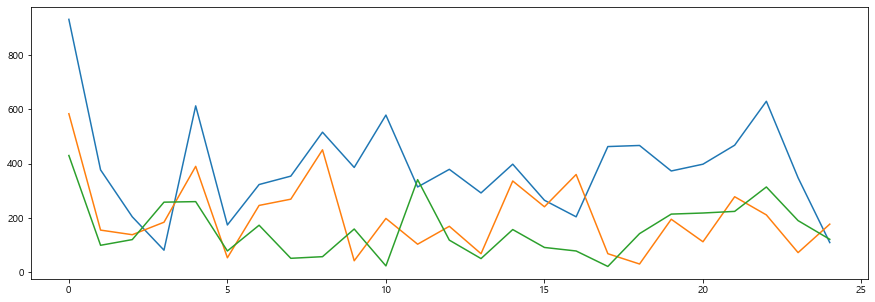

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(df1['2016년'])
plt.plot(df1['2015년'])
plt.plot(df1['2014년'])
plt.show()

In [49]:
df2.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,-348,감소,상
강동구,1010,379,99,155,377,-222,감소,하
강북구,831,369,120,138,204,-66,감소,하
강서구,911,388,258,184,81,103,증가,하
관악구,2109,846,260,390,613,-223,감소,상


<AxesSubplot:xlabel='기관명'>

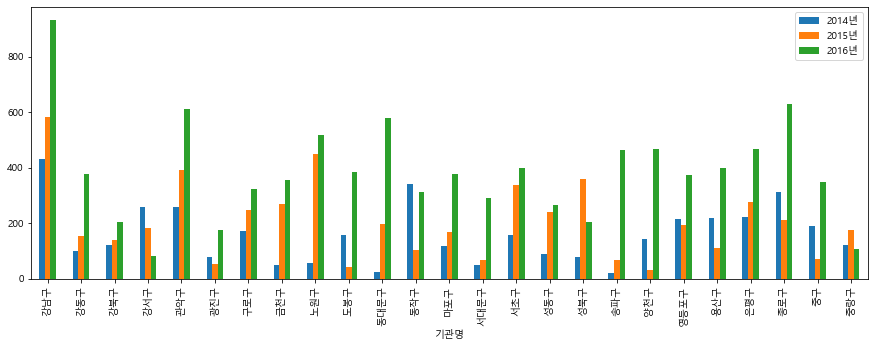

In [76]:

df2.loc[:,'2014년':'2016년'].plot(kind='bar',figsize=(15,5))

In [51]:
df2.head()

,소계,2013년도 이전,2014년,2015년,2016년,2016증감,증감,구간
기관명,,,,,,,,
강남구,3238,1292,430,584,932,-348,감소,상
강동구,1010,379,99,155,377,-222,감소,하
강북구,831,369,120,138,204,-66,감소,하
강서구,911,388,258,184,81,103,증가,하
관악구,2109,846,260,390,613,-223,감소,상


In [ ]:
df2['구간'].plot(kind=pie)

In [79]:
def chart_pi(분류,열):
    tmp=df1.groupby(분류)[열].mean()
    tmp.plot(kind='pie',autopct = '%1.1f%%')
    plt.title(열 + 분류)



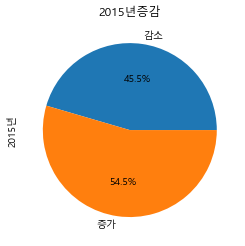

In [82]:
chart_pi('증감','2015년')

## apply, applymap, map 함수 활용
> - apply(), map() : Series에 적용되는 함수
> - applymat(): DataFrame에 적용되는 함수

###  [형식]
   - result=DataFrame.applymap(func)
   - result=Series.map(arg)
  - func : 적용할 함수
  - arg: 적용할 함수 or 매핑시킬 딕셔너리 자료형

In [83]:
df=pd.read_csv('./data/cctv_in_seoul.csv')
df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [84]:
#'구간'열 추가: 상: 값>=200, 중: 소계>=150 하: 150미만
def gu(x):
    if x>=200:
        return '상'
    elif x>=150:
        return '중'
    else:
        return '하'

In [89]:
#apply 함수 적용
df['2016년'].map(gu)

0     상
1     상
2     상
3     하
4     상
5     중
6     상
7     상
8     상
9     상
10    상
11    상
12    상
13    상
14    상
15    상
16    상
17    상
18    상
19    상
20    상
21    상
22    상
23    상
24    하
Name: 2016년, dtype: object

In [90]:
# map함수 적용
df['2016년'].map(gu)

0     상
1     상
2     상
3     하
4     상
5     중
6     상
7     상
8     상
9     상
10    상
11    상
12    상
13    상
14    상
15    상
16    상
17    상
18    상
19    상
20    상
21    상
22    상
23    상
24    하
Name: 2016년, dtype: object

In [92]:
# applymap 적용
df[['2015년','2016년']].applymap(gu)

,2015년,2016년
0,상,상
1,중,상
2,하,상
3,중,하
4,상,상
5,하,중
6,상,상
7,상,상
8,상,상
9,하,상


In [95]:
# apply, map와  lambda함수
df['2016년'].map(lambda x: '상' if x>200 else '하')

0     상
1     상
2     상
3     하
4     상
5     하
6     상
7     상
8     상
9     상
10    상
11    상
12    상
13    상
14    상
15    상
16    상
17    상
18    상
19    상
20    상
21    상
22    상
23    상
24    하
Name: 2016년, dtype: object

In [96]:
df

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [97]:
df['기관명'].values

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [108]:
# map과 dict형 자료
df2=pd.DataFrame({
    '이름':['홍길동','김길동','이하나','이두리'],
    '성별':['남','남','여','남']
})

In [109]:
df2

,이름,성별
0,홍길동,남
1,김길동,남
2,이하나,여
3,이두리,남


In [104]:
dict={'남':0, '여':1}

['강남', '강남', '강남']

In [112]:
df2

,이름,성별
0,홍길동,남
1,김길동,남
2,이하나,여
3,이두리,남
